In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

### Prepare all the variable

In [9]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
folds_names = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']
image_size = {'rimone': (300,300),
            'g1020': (240,300),
            'refuge': (300,300),
            'papila': (200,300)}
image_format = {'rimone': 'png',
                'g1020': 'jpg',
                'refuge': 'jpg',
                'papila': 'jpg'}

In [10]:
path_dataset = {}
for scenario in scenario_names:
    for dataset in dataset_names:
        path_dataset[scenario
                    + '_'
                    + dataset] = os.path.join(path_source,
                                            scenario,
                                            dataset)
del scenario, dataset

In [11]:
datagenerator_s1 = ImageDataGenerator(
    rescale=1./255,
)
datagenerator_s2345 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)

### Scenario 1
no augmentation, rgb color, no clahe
#### Show Image

In [12]:
s1_src = []
augment = 'none'
col_mode = 'rgb'
for dataset in dataset_names:
    print(f'Loading {dataset} fold 1 train data...')
    s1_src.append(datagenerator_s1.flow_from_directory(
                os.path.join(path_dataset[f'scenario_1_{dataset}'],
                            folds_names[0],
                            'train'),
                target_size=image_size[dataset],
                color_mode=col_mode,
                class_mode='binary',
                shuffle=True,
                seed=1915026018))
del dataset

Loading rimone fold 1 train data...
Found 339 images belonging to 2 classes.


Loading g1020 fold 1 train data...
Found 714 images belonging to 2 classes.
Loading refuge fold 1 train data...
Found 840 images belonging to 2 classes.
Loading papila fold 1 train data...
Found 341 images belonging to 2 classes.


Showing d:\\Programming\\Python\\Skripsi\\dataset\\used\scenario_1\rimone\fold_1\train...


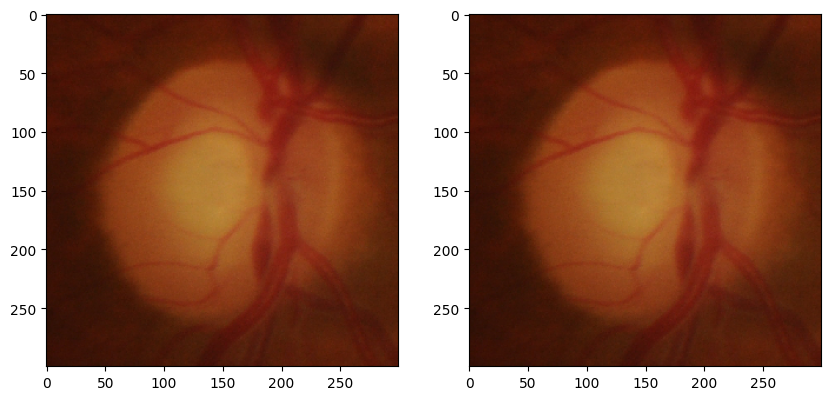

Showing d:\\Programming\\Python\\Skripsi\\dataset\\used\scenario_1\g1020\fold_1\train...


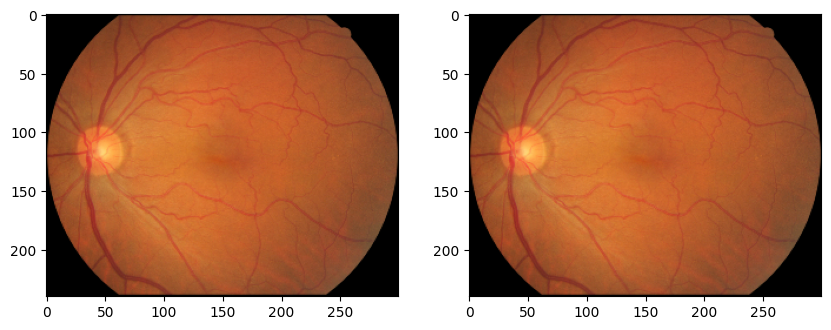

Showing d:\\Programming\\Python\\Skripsi\\dataset\\used\scenario_1\refuge\fold_1\train...


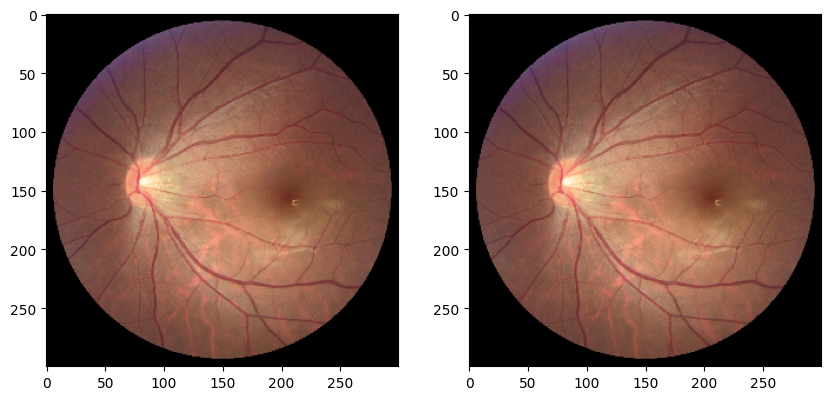

Showing d:\\Programming\\Python\\Skripsi\\dataset\\used\scenario_1\papila\fold_1\train...


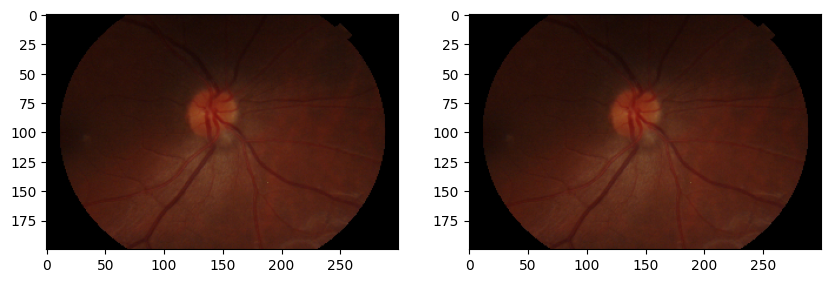

In [13]:
for s1_src_datagen in s1_src:
    print(f'Showing {s1_src_datagen.directory}...')
    image = next(s1_src_datagen)
    augment_image.show_augmented_img(image=image[0][0],
                                    augment_type=augment,
                                    color_mode=col_mode)

In [7]:
import matplotlib.pyplot as plt

In [8]:
s1_rimone_src.class_indices

NameError: name 's1_rimone_src' is not defined

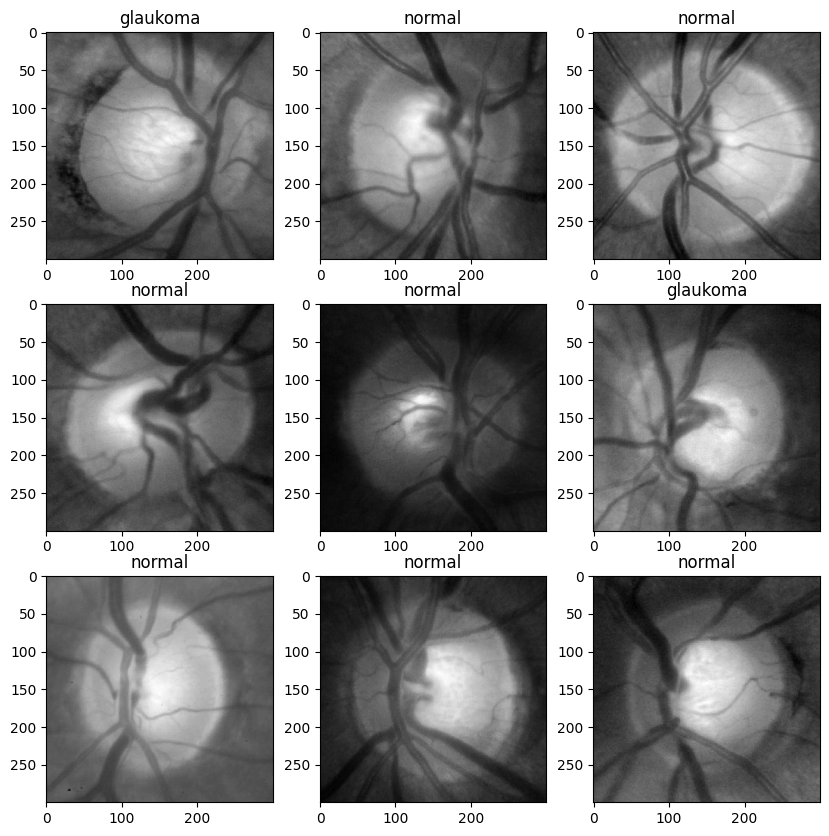

In [ ]:
fig_row = 3
fig_col = 3
position = (s1_rimone_src.batch_index - 1) * s1_rimone_src.batch_size
plt.figure(figsize=(10, 10))
image = next(s1_rimone_src)
for i in range (fig_row * fig_col):
    plt.subplot(fig_row, fig_col, i+1)
    # image = s1_rimone_src.next()
    plt.title(list(s1_rimone_src.class_indices.keys())[int(image[1][i])])
    plt.imshow(image[0][i], cmap='gray')
    # plt.title(list(s1_rimone_src.class_indices.keys())[int(s1_rimone_src[i][1][0])])
    # plt.imshow(s1_rimone_src[i][0][0])
    # plt.axis('off')